In [2]:
import os
import sys
import math

from scipy.stats import poisson
from scipy.stats import norm
import scipy.io

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd

In [3]:
AN = True

probe_map = np.array([[975,0],[875,0],[775,0],[675,0],[575,0],[475,0],[375,0],
                [275,0],[175,0],[75,0],[0,0],[50,16],[100,20],[150,20],[200,20],
                [250,20],[300,20],[1050,20],[1000,20],[950,20],[900,20],[850,20],
                [800,20],[750,20],[700,20],[650,20],[600,20],[550,20],[500,20],
                [450,20],[400,20],[350,20],[300,-20],[350,-20],[400,-20],[450,-20],
                [500,-20],[550,-20],[600,-20],[650,-20],[700,-20],[750,-20],[800,-20],
                [850,-20],[900,-20],[950,-20],[1000,-20],[1050,-20],[250,-20],[200,-20],
                [150,-20],[100,-20],[50,-16],[25,0],[125,0],[225,0],[325,0],[425,0],
                [525,0],[625,0],[725,0],[825,0],[925,0],[1025,0],[1025,200],[925,200],
                [825,200],[725,200],[625,200],[525,200],[425,200],[325,200],[225,200],
                [125,200],[25,200],[50,184],[100,180],[150,180],[200,180],[250,180],
                [1050,180],[1000,180],[950,180],[900,180],[850,180],[800,180],[750,180],
                [700,180],[650,180],[600,180],[550,180],[500,180],[450,180],[400,180],
                [350,180],[300,180],[350,220],[400,220],[450,220],[500,220],[550,220],
                [600,220],[650,220],[700,220],[750,220],[800,220],[850,220],[900,220],
                [950,220],[1000,220],[1050,220],[300,220],[250,220],[200,220],[150,220],
                [100,220],[50,216],[0,200],[75,200],[175,200],[275,200],[375,200],
                [475,200],[575,200],[675,200],[775,200],[875,200],[975,200],[1025,400],
                [925,400],[825,400],[725,400],[625,400],[525,400],[425,400],[325,400],
                [225,400],[125,400],[25,400],[50,384],[100,380],[150,380],[200,380],
                [250,380],[1050,380],[1000,380],[950,380],[900,380],[850,380],[800,380],
                [750,380],[700,380],[650,380],[600,380],[550,380],[500,380],[450,380],
                [400,380],[350,380],[300,380],[350,420],[400,420],[450,420],[500,420],
                [550,420],[600,420],[650,420],[700,420],[750,420],[800,420],[850,420],
                [900,420],[950,420],[1000,420],[1050,420],[300,420],[250,420],[200,420],
                [150,420],[100,420],[50,416],[0,400],[75,400],[175,400],[275,400],
                [375,400],[475,400],[575,400],[675,400],[775,400],[875,400],[975,400],
                [975,600],[875,600],[775,600],[675,600],[575,600],[475,600],[375,600],
                [275,600],[175,600],[75,600],[0,600],[50,616],[100,620],[150,620],
                [200,620],[250,620],[300,620],[1050,620],[1000,620],[950,620],[900,620],
                [850,620],[800,620],[750,620],[700,620],[650,620],[600,620],[550,620],
                [500,620],[450,620],[400,620],[350,620],[300,580],[350,580],[400,580],
                [450,580],[500,580],[550,580],[600,580],[650,580],[700,580],[750,580],
                [800,580],[850,580],[900,580],[950,580],[1000,580],[1050,580],[250,580],
                [200,580],[150,580],[100,580],[50,584],[25,600],[125,600],[225,600],
                [325,600],[425,600],[525,600],[625,600],[725,600],[825,600],[925,600],
                [1025,600]])

if not AN:
    for i in range(4):
        probe_map[64*(i):(64*(i+1)),1]+=(i*200)

In [5]:
path = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(path + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(path + 'asdf.mat')['IDs']
location = scipy.io.loadmat(path + 'asdf.mat')['location']

eisummary = scipy.io.loadmat(path + 'eisummary.mat')
xy = scipy.io.loadmat(path + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(path + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(path + 'ttlTimes.mat')['ttlTimes'])/1000
print(rise[:5])

[638.81    638.93255 639.94455 640.93355 641.9326 ]


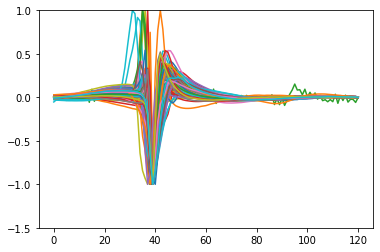

Total number of neurons: 130


In [6]:
plt.plot(eisummary['waveforms'].T)

plt.ylim([-1.5,1.])
plt.show()

print('Total number of neurons: {}'.format(eisummary['waveforms'].shape[0]))

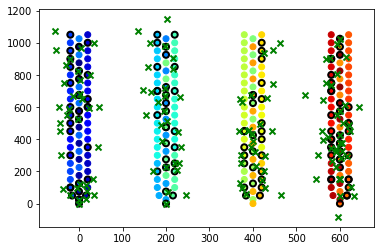

130


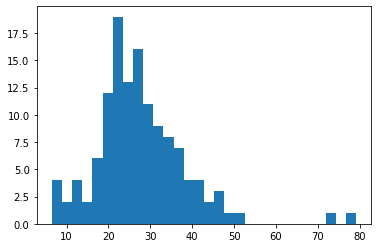

In [7]:
save = False

plt.scatter(probe_map[:,1], probe_map[:,0], c=np.arange(256), cmap='jet')
plt.scatter(location[:,1], location[:,0], c='None', edgecolors='black',
            linewidth=2, alpha=1)
plt.scatter(xy['y'],xy['x'], color='green', linewidth = 2, marker='x') #s=np.squeeze(xy['ys']))

plt.show()

plt.hist(np.squeeze(xy['ys']), bins = 30)
print(np.sum(xy['ys']==xy['xs']))
plt.show()

In [9]:
import os
import sys
sys.path.append('/home/feldheimlab/Desktop/population encoding data')
import numpy as np
import pandas as pd

from Experiment import *


/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
130/130 neurons are in the SC
	Loading AuditorySpotSummary_2.mat with SciPy
	Loading AuditorySpotSummary_7.mat with SciPy
67 89


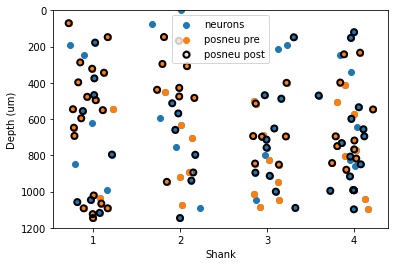

In [10]:

#load the data for each of the datsets
print(path)
e = Experiment(path) # load the experimental data
# e.resetUseIDs()

print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')

posneu2 = np.where(e.loadData('AuditorySpotSummary_2.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('AuditorySpotSummary_7.mat')['posneu'])[0]

print(posneu2.shape[0], posneu4.shape[0])

plt.scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
plt.scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')
 
# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

plt.ylim([1200,0])
plt.legend()
plt.ylabel('Depth (um)')
plt.xlabel('Shank')
plt.xticks([0,200,400,600],[1,2,3,4])

plt.show()

In [11]:
timerange = 200
timeBinSz = 5

azim = [-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144]
elev = [0,40]

pat2 = e.loadData('AuditorySpotSummary_2.mat')['patterns_2s']['fullpat'][0][0]
print(pat2.shape)
data_mat2 = patternToMatrix(pat2[0], timerange, timeBinSz, np.arange(len(posneu2)), norm=False, count=True)    

pat4 = e.loadData('AuditorySpotSummary_7.mat')['patterns_2s']['fullpat'][0][0]
data_mat4 = patternToMatrix(pat4[0], timerange, timeBinSz, np.arange(len(posneu4)), norm=False, count=True) 

  

	Loading AuditorySpotSummary_2.mat with SciPy
(1, 2, 17, 30, 67)
	Loading AuditorySpotSummary_7.mat with SciPy


[[ 7.  2.  2.  3.  1.  2.  3.  8.  3. 15. 15. 14. 17. 13. 10.  6.  2.]
 [ 6.  7.  7.  3.  6.  9. 10.  8.  7. 20. 14. 17. 14. 18.  9.  7. 12.]]
0 20.0


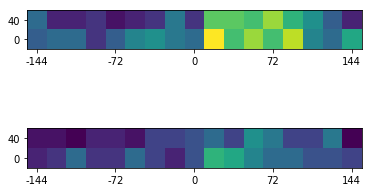

In [12]:
neuron = 30
sneuron = np.where(posneu4 == posneu2[neuron])[0][0]
startbin = 2
endbin = 4

fig, axs = plt.subplots(2,1)
datasum1 = np.sum(data_mat2[neuron,:,:,:,startbin:endbin], axis=(2,3))
print(datasum1)
vmin = 0 
vmax = np.max(datasum1)
axs[0].imshow(datasum1, vmin=vmin, vmax=vmax)
print(vmin, vmax)
axs[0].set_xticks(np.arange(len(azim)+1)[::4])
axs[0].set_xticklabels(azim[::4])
axs[0].set_yticks([1,0])
axs[0].set_yticklabels(elev)

datasum2 = np.sum(data_mat4[sneuron,:,:,:,startbin:endbin], axis=(2,3))
axs[1].imshow(datasum2, vmin=vmin, vmax=vmax)
axs[1].set_xticks(np.arange(len(azim)+1)[::4])
axs[1].set_xticklabels(azim[::4])
axs[1].set_yticks([1,0])
axs[1].set_yticklabels(elev)

plt.show()

Found neuron:  0
Found neuron:  1
Found neuron:  4
Found neuron:  5
Found neuron:  6
Found neuron:  8
Found neuron:  9
Found neuron:  12
Found neuron:  13
Did not find neuron:  15
Found neuron:  16
Found neuron:  17
Found neuron:  18
Found neuron:  19
Found neuron:  20
Found neuron:  21
Found neuron:  24
Found neuron:  25
Found neuron:  26
Found neuron:  27
Found neuron:  28
Found neuron:  30
Found neuron:  31
Did not find neuron:  32
Found neuron:  33
Found neuron:  37
Found neuron:  38
Found neuron:  39
Found neuron:  41
Did not find neuron:  42
Found neuron:  43
Found neuron:  45
Found neuron:  46
Found neuron:  47
Found neuron:  49
Found neuron:  52
Found neuron:  54
Found neuron:  55
Found neuron:  56
Found neuron:  57
Found neuron:  59
Did not find neuron:  60
Did not find neuron:  61
Did not find neuron:  63
Did not find neuron:  66
Did not find neuron:  68
Did not find neuron:  69
Found neuron:  70
Found neuron:  71
Found neuron:  72
Found neuron:  73
Did not find neuron:  74
D

/tmp/ipykernel_3482/103855437.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


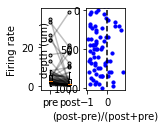

Ttest_relResult(statistic=2.368439716281931, pvalue=0.020588569891961457)
72 18


In [15]:
import scipy.stats as stats

pos = 0
neg = 0

fig, axs = plt.subplots(1, 2, figsize = (1.5,1.5))


frall = [[],[]]
ratio = []
found_n = []
for n, neuron in enumerate(posneu2):
    if neuron in posneu4:
        print('Found neuron: ', neuron)
        pos+=1
        found_n.append(neuron)
        nsamples = (np.prod(data_mat2.shape[1:4]))
        pre = np.count_nonzero(data_mat2[n,:,:,:,:4])/(nsamples*.020)
        n_comp = np.where(posneu4==neuron)[0]
        post = np.count_nonzero(data_mat4[n_comp,:,:,:,:4])/(nsamples*.020)
        frall[0].append(pre)
        frall[1].append(post)
        axs[0].plot([1,2], [pre, post], c='k', alpha = 0.25)
    
        ratio.append((post-pre)/(pre+post))
    
        axs[1].scatter(ratio[-1], 1000-location[neuron,0], c='b', s=10)
#         axs[2].scatter(ratio[-1], location[neuron,1], c='b', s=10)
        
    else:
        print('Did not find neuron: ', neuron)
        neg+=1
        
flierprops = dict(marker='.')
axs[0].boxplot(frall, flierprops=flierprops)
axs[0].set_ylabel('Firing rate')
axs[0].set_xticklabels(['pre', 'post'])

axs[1].vlines(0,0, 1000, linestyle='--', color='k')
axs[1].set_ylim(1025, -25)
axs[1].set_ylabel('depth (um)')  
axs[1].set_xlabel('(post-pre)/(post+pre)')

# axs[2].vlines(0,0, 1200, linestyle='--', color='k')
# axs[2].set_ylabel('shank')  
# axs[2].set_xlabel('(post-pre)/(post+pre)')
# axs[2].set_yticks([0,400,800,1200])
# axs[2].set_yticklabels([1,2,3,4])

# im1 = axs[3].scatter(location[found_n,1], 1000-location[found_n,0], 
#                      c=ratio, cmap='RdBu', alpha = 0.75, vmin=-1, vmax=1)
# axs[3].set_xlabel('shank')  
# axs[3].set_ylabel('depth (um)')
# axs[3].set_ylim(1025, -25)
# axs[3].set_xticks([0,400,800,1200])
# axs[3].set_xticklabels([1,2,3,4])

# divider = make_axes_locatable(axs[3])

# cax = divider.append_axes('right', size='5%', pad=0.05)
# cbar = fig.colorbar(im1, cax =cax , orientation='vertical')
# cbar.set_ticks([-1,0,1])

plt.tight_layout()
plt.savefig('/home/feldheimlab/Desktop/initial_fr_change.svg', dpi=300)
plt.show()        

print(stats.ttest_rel(frall[0], frall[1]))
print(pos, neg)


Window 0.02 - 0.1 secs for a duration 0.08
Found neuron:  0
Found neuron:  1
Found neuron:  4
Found neuron:  5
Found neuron:  6
Found neuron:  8
Found neuron:  9
Found neuron:  12
Found neuron:  13
Did not find neuron:  15
Found neuron:  16
Found neuron:  17
Found neuron:  18
Found neuron:  19
Found neuron:  20
Found neuron:  21
Found neuron:  24
Found neuron:  25
Found neuron:  26
Found neuron:  27
Found neuron:  28
Found neuron:  30
Found neuron:  31
Did not find neuron:  32
Found neuron:  33
Found neuron:  37
Found neuron:  38
Found neuron:  39
Found neuron:  41
Did not find neuron:  42
Found neuron:  43
Found neuron:  45
Found neuron:  46
Found neuron:  47
Found neuron:  49
Found neuron:  52
Found neuron:  54
Found neuron:  55
Found neuron:  56
Found neuron:  57
Found neuron:  59
Did not find neuron:  60
Did not find neuron:  61
Did not find neuron:  63
Did not find neuron:  66
Did not find neuron:  68
Did not find neuron:  69
Found neuron:  70
Found neuron:  71
Found neuron:  72
F

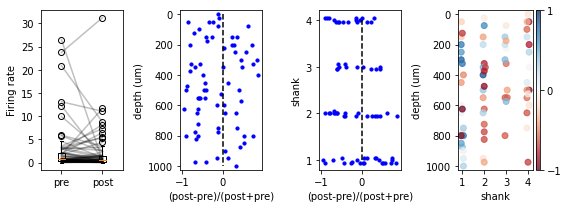

72 18


In [11]:
pos = 0
neg = 0

fig, axs = plt.subplots(1, 4, figsize = (8,3))
nsamples = (np.prod(data_mat2.shape[1:4]))
start = 4
end = 20

frall = [[],[]]
ratio = []
found_n = []
for n, neuron in enumerate(posneu2):
    if n == 0:
        sz = data_mat2[n,:,:,:,start:end].shape
        print('Window {0} - {1} secs for a duration {2}'.format(start*0.005,end*0.005,0.005*sz[-1]))
    if neuron in posneu4:
        print('Found neuron: ', neuron)
        pos+=1
        found_n.append(neuron)
        pre = np.count_nonzero(data_mat2[n,:,:,:,start:end])/(nsamples*sz[-1]*.005)
        n_comp = np.where(posneu4==neuron)[0]
        post = np.count_nonzero(data_mat4[n_comp,:,:,:,start:end])/(nsamples*sz[-1]*.005)
        frall[0].append(pre)
        frall[1].append(post)
        axs[0].plot([1,2], [pre, post], c='k', alpha = 0.25)
    
        ratio.append((post-pre)/(pre+post))
    
        axs[1].scatter(ratio[-1], location[neuron,0], c='b', s=10)
        axs[2].scatter(ratio[-1], location[neuron,1], c='b', s=10)
        
    else:
        print('Did not find neuron: ', neuron)
        neg+=1
        
axs[0].boxplot(frall)
axs[0].set_ylabel('Firing rate')
axs[0].set_xticklabels(['pre', 'post'])

axs[1].vlines(0,0, 1000, linestyle='--', color='k')
axs[1].set_ylim(1025, -25)
axs[1].set_ylabel('depth (um)')  
axs[1].set_xlabel('(post-pre)/(post+pre)')

axs[2].vlines(0,0, 1200, linestyle='--', color='k')
axs[2].set_ylabel('shank')  
axs[2].set_xlabel('(post-pre)/(post+pre)')
axs[2].set_yticks([0,400,800,1200])
axs[2].set_yticklabels([1,2,3,4])

im1 = axs[3].scatter(location[found_n,1], location[found_n,0], 
                     c=ratio, cmap='RdBu', alpha = 0.75, vmin=-1, vmax=1)
axs[3].set_xlabel('shank')  
axs[3].set_ylabel('depth (um)')
axs[3].set_ylim(1025, -25)
axs[3].set_xticks([0,400,800,1200])
axs[3].set_xticklabels([1,2,3,4])

divider = make_axes_locatable(axs[3])

cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax =cax , orientation='vertical')
cbar.set_ticks([-1,0,1])

plt.tight_layout()
plt.show()        

        
print(pos, neg)


Window 0.1 - 0.2 secs for a duration 0.1
Found neuron:  0
Found neuron:  1
Found neuron:  4
Found neuron:  5
Found neuron:  6
Found neuron:  8
Found neuron:  9
Found neuron:  12
Found neuron:  13
Did not find neuron:  15
Found neuron:  16
Found neuron:  17
Found neuron:  18
Found neuron:  19
Found neuron:  20
Found neuron:  21
Found neuron:  24
Found neuron:  25
Found neuron:  26
Found neuron:  27
Found neuron:  28
Found neuron:  30
Found neuron:  31
Did not find neuron:  32
Found neuron:  33
Found neuron:  37
Found neuron:  38
Found neuron:  39
Found neuron:  41
Did not find neuron:  42
Found neuron:  43
Found neuron:  45
Found neuron:  46
Found neuron:  47
Found neuron:  49
Found neuron:  52
Found neuron:  54
Found neuron:  55
Found neuron:  56
Found neuron:  57
Found neuron:  59
Did not find neuron:  60
Did not find neuron:  61
Did not find neuron:  63
Did not find neuron:  66
Did not find neuron:  68
Did not find neuron:  69
Found neuron:  70
Found neuron:  71
Found neuron:  72
Fou

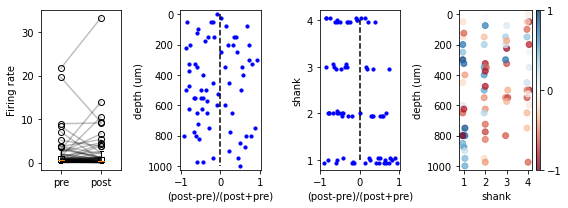

72 18


In [12]:
pos = 0
neg = 0

fig, axs = plt.subplots(1, 4, figsize = (8,3))
nsamples = (np.prod(data_mat2.shape[1:4]))
start = 20
end = 40

frall = [[],[]]
ratio = []
found_n = []
for n, neuron in enumerate(posneu2):
    if n == 0:
        sz = data_mat2[n,:,:,:,start:end].shape
        print('Window {0} - {1} secs for a duration {2}'.format(start*0.005,end*0.005,0.005*sz[-1]))
    if neuron in posneu4:
        print('Found neuron: ', neuron)
        pos+=1
        found_n.append(neuron)
        pre = np.count_nonzero(data_mat2[n,:,:,:,start:end])/(nsamples*sz[-1]*.005)
        n_comp = np.where(posneu4==neuron)[0]
        post = np.count_nonzero(data_mat4[n_comp,:,:,:,start:end])/(nsamples*sz[-1]*.005)
        frall[0].append(pre)
        frall[1].append(post)
        axs[0].plot([1,2], [pre, post], c='k', alpha = 0.25)
    
        ratio.append((post-pre)/(pre+post))
    
        axs[1].scatter(ratio[-1], location[neuron,0], c='b', s=10)
        axs[2].scatter(ratio[-1], location[neuron,1], c='b', s=10)
        
    else:
        print('Did not find neuron: ', neuron)
        neg+=1
        
axs[0].boxplot(frall)
axs[0].set_ylabel('Firing rate')
axs[0].set_xticklabels(['pre', 'post'])

axs[1].vlines(0,0, 1000, linestyle='--', color='k')
axs[1].set_ylim(1025, -25)
axs[1].set_ylabel('depth (um)')  
axs[1].set_xlabel('(post-pre)/(post+pre)')

axs[2].vlines(0,0, 1200, linestyle='--', color='k')
axs[2].set_ylabel('shank')  
axs[2].set_xlabel('(post-pre)/(post+pre)')
axs[2].set_yticks([0,400,800,1200])
axs[2].set_yticklabels([1,2,3,4])

im1 = axs[3].scatter(location[found_n,1], location[found_n,0], 
                     c=ratio, cmap='RdBu', alpha = 0.75, vmin=-1, vmax=1)
axs[3].set_xlabel('shank')  
axs[3].set_ylabel('depth (um)')
axs[3].set_ylim(1025, -25)
axs[3].set_xticks([0,400,800,1200])
axs[3].set_xticklabels([1,2,3,4])

divider = make_axes_locatable(axs[3])

cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax =cax , orientation='vertical')
cbar.set_ticks([-1,0,1])

plt.tight_layout()
plt.show()        

        
print(pos, neg)
